<a href="https://colab.research.google.com/github/gabrielfernandezf/py/blob/main/world_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://nbviewer.org/github/tgherzog/wbgapi/blob/master/examples/wbgapi-cookbook.ipynb

In [ ]:
!pip install wbgapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import wbgapi as wb   # I use wb as a namespace in all my work
import pandas as pd   # optional but highly recommended for wbgapi
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

In [ ]:
wb.series.info(q='energy')
# wb.search('pound')

id,value
EG.EGY.PRIM.PP.KD,Energy intensity level of primary energy (MJ/$2017 PPP GDP)
EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final energy consumption)
EG.GDP.PUSE.KO.PP,GDP per unit of energy use (PPP $ per kg of oil equivalent)
EG.GDP.PUSE.KO.PP.KD,GDP per unit of energy use (constant 2017 PPP $ per kg of oil equivalent)
EG.IMP.CONS.ZS,"Energy imports, net (% of energy use)"
EG.USE.COMM.CL.ZS,Alternative and nuclear energy (% of total energy use)
EG.USE.COMM.FO.ZS,Fossil fuel energy consumption (% of total)
EG.USE.COMM.GD.PP.KD,"Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)"
EG.USE.PCAP.KG.OE,Energy use (kg of oil equivalent per capita)
EN.ATM.METH.EG.KT.CE,Methane emissions in energy sector (thousand metric tons of CO2 equivalent)


###DATA QUERIES

In [ ]:
energy = ['TX.VAL.MMTL.ZS.UN', 'IE.PPI.ENGY.CD', 'NY.GDP.MINR.RT.ZS',
          'NY.GDP.NGAS.RT.ZS', 'NY.GDP.PETR.RT.ZS', 'TM.VAL.FUEL.ZS.UN',
          'TX.VAL.FUEL.ZS.UN']

In [ ]:
world_bank = wb.data.DataFrame(energy, time=range(2016, 2021, 1), labels=True)

In [ ]:
world_bank['average'] = world_bank.mean(numeric_only=True, axis=1)

In [ ]:
wb_data = pd.DataFrame(world_bank)
wb_data = wb_data.reset_index()

In [ ]:
wb_data = wb_data[['economy', 'series','Series', 'average']]

In [ ]:
wb_data.head(1)

,economy,series,Series,average
0,ZWE,TX.VAL.MMTL.ZS.UN,Ores and metals exports (% of merchandise expo...,34.472279


In [ ]:
variables = wb_data[['series', 'Series']].drop_duplicates()

In [ ]:
var = wb_data['series'].unique()
var

array(['TX.VAL.MMTL.ZS.UN', 'IE.PPI.ENGY.CD', 'NY.GDP.MINR.RT.ZS',
       'NY.GDP.NGAS.RT.ZS', 'NY.GDP.PETR.RT.ZS', 'TM.VAL.FUEL.ZS.UN',
       'TX.VAL.FUEL.ZS.UN'], dtype=object)

In [ ]:
wb_data = wb_data.pivot(index='economy', columns='series', values='average')


In [ ]:
df_wb = wb_data.dropna()

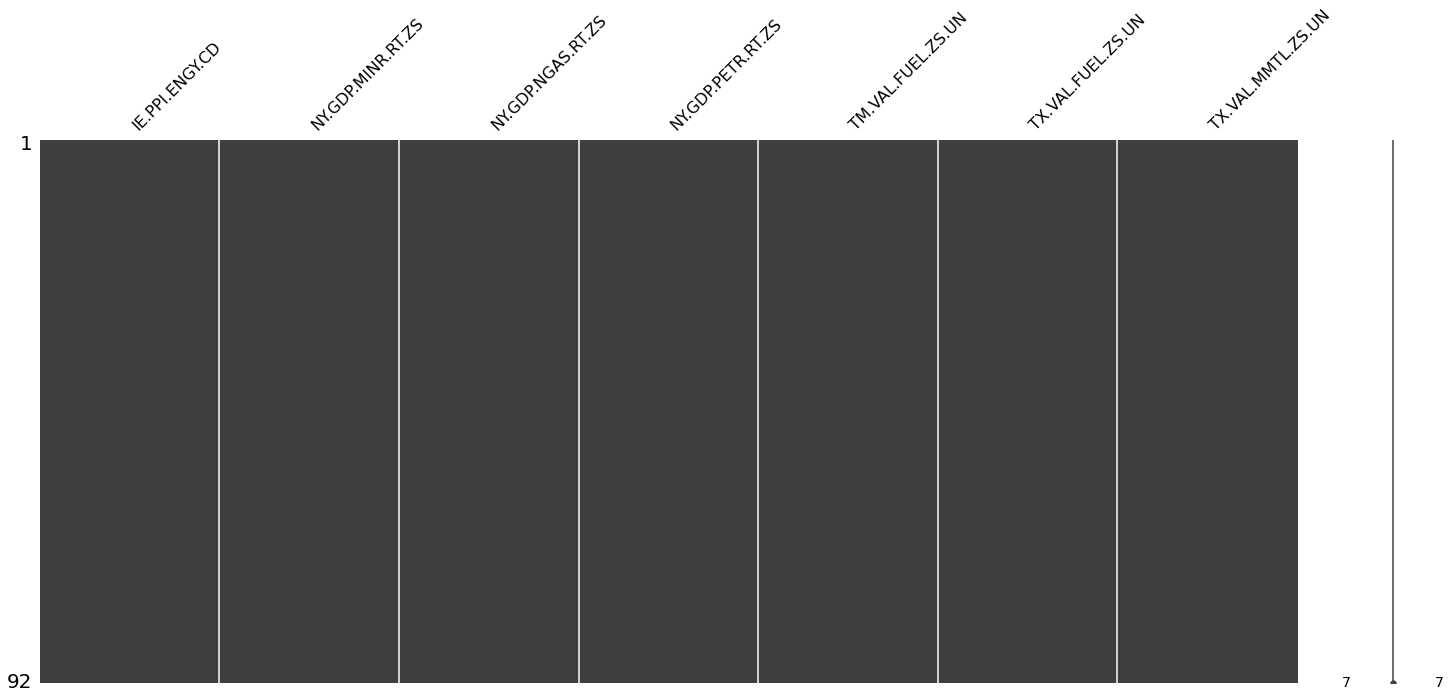

In [ ]:
msno.matrix(df_wb)

In [ ]:
df_wb.shape

(92, 7)

In [ ]:
# A1,A2,A3,A4,A5,A6,A7 = ['TX.VAL.MMTL.ZS.UN','IE.PPI.ENGY.CD','NY.GDP.MINR.RT.ZS',
# 'NY.GDP.NGAS.RT.ZS', 'NY.GDP.PETR.RT.ZS', 'TM.VAL.FUEL.ZS.UN','TX.VAL.FUEL.ZS.UN']

In [ ]:
# A_1 = wb.data.DataFrame(A1, time=range(2016, 2022, 1), labels=True)
# A_2 = wb.data.DataFrame(A1, time=range(2016, 2022, 1), labels=True)
# A_3 = wb.data.DataFrame(A1, time=range(2016, 2022, 1), labels=True)
# A_4 = wb.data.DataFrame(A1, time=range(2016, 2022, 1), labels=True)
# A_ = wb.data.DataFrame(A1, time=range(2016, 2022, 1), labels=True)
# A_1 = wb.data.DataFrame(A1, time=range(2016, 2022, 1), labels=True)


### **CHARTING & PLOTTING**

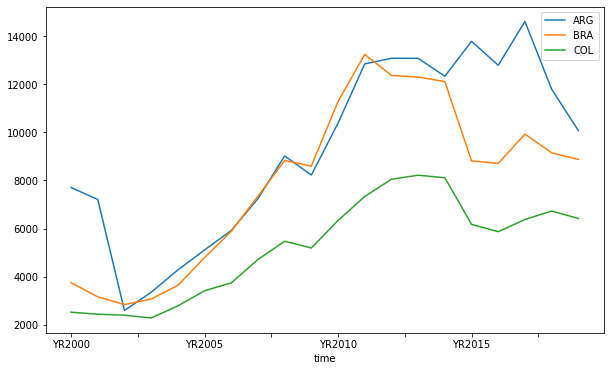

In [ ]:
wb.data.DataFrame('NY.GDP.PCAP.CD', ['BRA', 'ARG', 'COL'],
                  range(2000, 2020), index='time').plot(figsize=(10, 6))
plt.show()

### **QUERY**

In [ ]:
variables = []

In [ ]:
df = wb.data.DataFrame('SP.POP.TOTL', 'BRA', db=57, time=range(2000, 2020),
                       version=range(201004, 202004, 100), index='time')
df

,201004,201104,201204,201304,201404,201504,201604,201704,201804,201904
time,,,,,,,,,,
YR2000,174174447.0,174174447.0,174425387.0,174425387.0,174504898.0,174504898.0,175786441.0,175786441.0,175287587.0,175287587.0
YR2001,176659138.0,176659138.0,176877135.0,176877135.0,176968205.0,176968205.0,178419396.0,178419396.0,177750670.0,177750670.0
YR2002,179123364.0,179123364.0,179289227.0,179289227.0,179393768.0,179393768.0,181045592.0,181045592.0,180151021.0,180151021.0
YR2003,181537359.0,181537359.0,181633074.0,181633074.0,181752951.0,181752951.0,183627339.0,183627339.0,182482149.0,182482149.0
YR2004,183863524.0,183863524.0,183873377.0,183873377.0,184010283.0,184010283.0,186116363.0,186116363.0,184738458.0,184738458.0
YR2005,186074634.0,186074634.0,185986964.0,185986964.0,186142403.0,186142403.0,188479240.0,188479240.0,186917361.0,186917361.0
YR2006,188158438.0,188158438.0,187958211.0,187958211.0,188134315.0,188134315.0,190698241.0,190698241.0,189012412.0,189012412.0
YR2007,190119995.0,190119995.0,189798070.0,189798070.0,189996976.0,189996976.0,192784521.0,192784521.0,191026637.0,191026637.0
YR2008,191971506.0,191971506.0,191543237.0,191543237.0,191765567.0,191765567.0,194769696.0,194769696.0,192979029.0,192979029.0
